In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [75]:
df = pd.read_csv('house_prices.csv')
df

,No,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area
0,1,6.6,90.45606,9,58.1
1,2,20.5,2185.12800,3,25.6
2,3,30.0,1013.34100,5,22.8
3,4,12.9,250.63100,7,39.3
4,5,29.4,4510.35900,1,13.2
...,...,...,...,...,...
395,396,40.9,167.59890,5,41.0
396,397,31.7,5512.03800,1,18.8
397,398,8.0,132.54690,9,47.3
398,399,11.9,3171.32900,0,46.6


In [76]:
feature_vectors = ['house age', 'distance to the nearest MRT station', 'number of convenience stores',
                       'house price of unit area']
feature_vectors

['house age',
 'distance to the nearest MRT station',
 'number of convenience stores',
 'house price of unit area']

In [77]:
data_house_age = df[feature_vectors[0]]
data_distance_to_station = df[feature_vectors[1]]
data_nb_of_stores = df[feature_vectors[2]]
data_house_price = df[feature_vectors[-1]]

max_house_age = max(list(data_house_age))
min_house_age = min(list(data_house_age))
new_house_age = [((x - min_house_age) / (max_house_age - min_house_age)) for x in list(data_house_age)]

max_distance_to_station = max(list(data_distance_to_station))
min_distance_to_station = min(list(data_distance_to_station))
new_distance_to_station = [((x - min_distance_to_station) / (max_distance_to_station - min_distance_to_station)) for
                           x in list(data_distance_to_station)]

max_nb_of_stores = max(list(data_nb_of_stores))
min_nb_of_stores = min(list(data_nb_of_stores))
new_nb_of_stores = [((x - min_nb_of_stores) / (max_nb_of_stores - min_nb_of_stores)) for x in
                    list(data_nb_of_stores)]

max_house_price = max(list(data_house_price))
min_house_price = min(list(data_house_price))
new_house_price = [((x - min_house_price) / (max_house_price - min_house_price)) for x in list(data_house_price)]


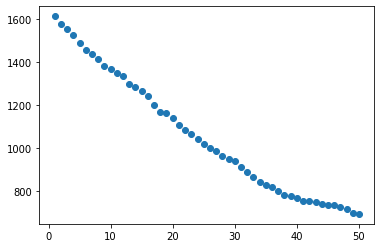

In [103]:
# step 2: Creating test and training set
# total data y
data_house_price_y = np.array(data_house_price).reshape(-1, 1)
# total data x for three features
data_house_age_x = np.array(new_house_age).reshape(-1, 1)
data_distance_to_station_x = np.array(new_distance_to_station).reshape(-1, 1)
data_nb_of_stores_x = np.array(new_nb_of_stores).reshape(-1, 1)
# split data to training data and test data
# shuffle == false <==> not random
train_data_house_age_x, test_data_house_age_x, train_data_house_price_y, test_data_house_price_y = \
    train_test_split(data_house_age_x, data_house_price_y, test_size=0.25, shuffle=False)

# step 3: Stochastic gradient descent
loss_record = []  # record loss function value
iter_record = []  # record iteration value
training_len = len(train_data_house_age_x)
max_iteration = 50
alpha = 0.01  # learning rate
theta = [-1, -0.5]  # 𝜃 coefficients
iter_count = 0
error = 0

while iter_count < max_iteration:
    loss = 0
    i = random.randint(0, training_len - 1)  # choose an observation in training dataset randomly
    predicted_fuc = theta[0] * 1 + theta[1] * train_data_house_age_x[i][0]
    theta[0] = theta[0] + alpha * (train_data_house_price_y[i][0] - predicted_fuc) * 1
    theta[1] = theta[1] + alpha * (train_data_house_price_y[i][0] - predicted_fuc) * train_data_house_age_x[i][0]
    for j in range(training_len):
        predicted_fuc = theta[0] * 1 + theta[1] * train_data_house_age_x[j][0]
        error = (train_data_house_price_y[j][0] - predicted_fuc) ** 2
        loss = loss + error
    loss = (1 / training_len) * loss
    iter_count += 1
    loss_record.append(loss)
    iter_record.append(iter_count)

# step 4: Visualization
iter_x = np.array(iter_record).reshape(-1, 1)
loss_y = np.array(loss_record).reshape(-1, 1)


plt.scatter(iter_record, loss_record)
plt.show()

# # print(train_x, test_x)
# model = linear_model.LinearRegression()
# model.fit(train_x, train_y)
# predicted_y = model.predict(test_x)

# plt.scatter(train_x, train_y)
# plt.scatter(test_x, test_y, color = "red")
# plt.plot(test_x, predicted_y, color = "green")
# plt.show()


In [70]:
train_y

array([[58.1],
       [25.6],
       [22.8],
       [39.3],
       [13.2],
       [37.4],
       [38.3],
       [52.2],
       [42.5],
       [17.7],
       [47.9],
       [46.8],
       [46. ],
       [21.5],
       [41.4],
       [41.4],
       [53.3],
       [36.8],
       [48. ],
       [45.7],
       [46.7],
       [24.5],
       [26.2],
       [45.2],
       [30.6],
       [39.4],
       [15.6],
       [22.6],
       [23.5],
       [42. ],
       [43.5],
       [31.1],
       [44.3],
       [36.8],
       [31.3],
       [30.5],
       [25.9],
       [59.6],
       [48.2],
       [29.7],
       [39.3],
       [44.9],
       [12.2],
       [31.3],
       [38.6],
       [42. ],
       [42.6],
       [23.2],
       [26.6],
       [34.2],
       [37.4],
       [39.6],
       [35.6],
       [20. ],
       [20.7],
       [38.9],
       [45.5],
       [39.7],
       [50.5],
       [35.7],
       [36.7],
       [48.6],
       [49.3],
       [42.7],
       [13.8],
       [38.1],
       [55